In [1]:
%pip install pandas
import pandas as pd

# Load the dataset
file_path = 'wholesale_customers/Wholesale customers data.csv'
data = pd.read_csv(file_path)

# Drop the Region column
data = data.drop(columns=['Region'])

# Display the first few rows of the dataset to verify
data.head()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\LucaH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [2]:
# Filter the data for clients that are restaurants, hotels, and caf�s
filtered_data = data[data['Channel'] == 1]

# Drop the Channel column as it is no longer needed
filtered_data = filtered_data.drop(columns=['Channel'])

# Display the first few rows of the filtered dataset to verify
filtered_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
8,5963,3648,6192,425,1716,750
15,10253,1114,3821,397,964,412
17,5876,6157,2933,839,370,4478
19,7780,2495,9464,669,2518,501


In [3]:
# Normalize the data by computing the proportionate spending per product category
normalized_data = filtered_data.div(filtered_data.sum(axis=1), axis=0)

# Display the first few rows of the normalized dataset to verify
normalized_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301
8,0.318979,0.195143,0.331229,0.022735,0.091794,0.040120
15,0.604504,0.065680,0.225282,0.023407,0.056836,0.024291
17,0.284511,0.298116,0.142013,0.040624,0.017915,0.216821
19,0.332095,0.106501,0.403978,0.028557,0.107483,0.021386


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(normalized_data)

# Convert the standardized data back to a DataFrame
standardized_data = pd.DataFrame(standardized_data, columns=normalized_data.columns)

# Display the first few rows of the standardized dataset to verify
standardized_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.109896,-0.857327,-0.154208,0.798785,-0.340963,0.290978
1,-0.600937,0.465876,1.261660,-0.944372,1.011400,-0.249572
2,0.625555,-0.665130,0.414498,-0.938823,0.366241,-0.589364
3,-0.748999,1.365469,-0.251318,-0.796688,-0.352063,3.543608
4,-0.544596,-0.308512,1.843364,-0.896306,1.300940,-0.651734


In [5]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\LucaH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(normalized_data)

# Convert the standardized data back to a DataFrame
standardized_data = pd.DataFrame(standardized_data, columns=normalized_data.columns)

# Display the first few rows of the standardized dataset to verify
standardized_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.109896,-0.857327,-0.154208,0.798785,-0.340963,0.290978
1,-0.600937,0.465876,1.261660,-0.944372,1.011400,-0.249572
2,0.625555,-0.665130,0.414498,-0.938823,0.366241,-0.589364
3,-0.748999,1.365469,-0.251318,-0.796688,-0.352063,3.543608
4,-0.544596,-0.308512,1.843364,-0.896306,1.300940,-0.651734


In [7]:
from sklearn.cluster import KMeans

# Set the number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the standardized data
kmeans.fit(standardized_data)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the standardized data
standardized_data['Cluster'] = labels

# Display the first few rows of the dataset with cluster labels to verify
standardized_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.109896,-0.857327,-0.154208,0.798785,-0.340963,0.290978,3
1,-0.600937,0.465876,1.261660,-0.944372,1.011400,-0.249572,0
2,0.625555,-0.665130,0.414498,-0.938823,0.366241,-0.589364,1
3,-0.748999,1.365469,-0.251318,-0.796688,-0.352063,3.543608,2
4,-0.544596,-0.308512,1.843364,-0.896306,1.300940,-0.651734,0


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0 -1.316705  0.940767  1.636714 -0.671637          1.734274   -0.396405
1  0.855453 -0.489312 -0.451277 -0.435420         -0.334463   -0.339915
2 -0.936686  1.122738  0.451611 -0.281360         -0.096308    1.553393
3 -0.290602 -0.351864 -0.355285  1.445365         -0.259451   -0.185884


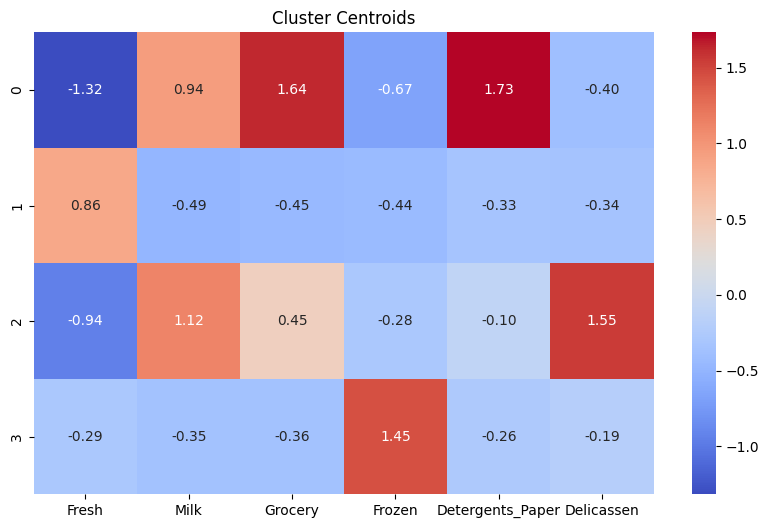

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Convert the centroids to a DataFrame
centroids_df = pd.DataFrame(centroids, columns=standardized_data.columns[:-1])

# Print the cluster centroids
print(centroids_df)

# Visualize the cluster centroids
plt.figure(figsize=(10, 6))
sns.heatmap(centroids_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Centroids')
plt.show()